<a href="https://colab.research.google.com/github/sajalsaini/Flower-Species-Prediction/blob/main/flower_species_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

# Loading the Dataset

In [ ]:
df = pd.read_csv("../input/iris/Iris.csv")

# EDA

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

***This means no missing values.***

# Scatter Plot (Sepal Length vs Sepal Width)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

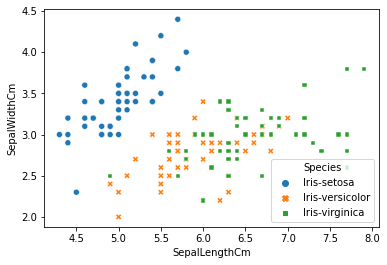

In [ ]:
sb.scatterplot(data = df, x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species", style = "Species")

# A jointplot of Histogram and Scatterplot to ease the interpretation of the dataset.

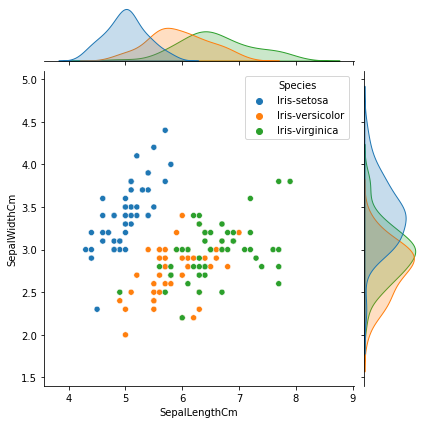

In [ ]:
sb.jointplot(data = df, x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

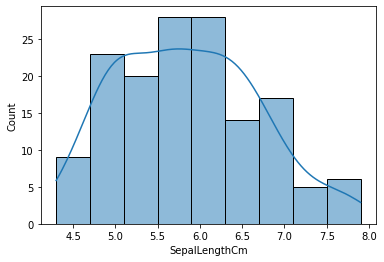

In [ ]:
sb.histplot(data = df, x = "SepalLengthCm", kde = True)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

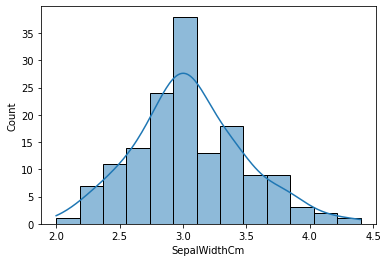

In [ ]:
sb.histplot(data = df, x = "SepalWidthCm", kde = True)

# Kernel Density Estimate Plot (Sepal Length vs Sepal Width)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

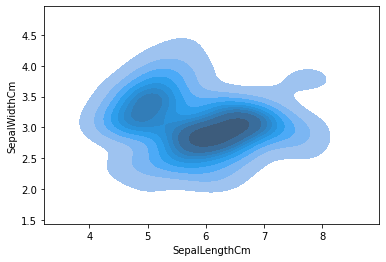

In [ ]:
sb.kdeplot(data = df, x = "SepalLengthCm", y = "SepalWidthCm", fill = True)

***From the plot we can see that most of the Sepal Lengths lie between 6 and 7 centimeters. Whereas, majority of the width values lie between 2.5 to 3 centimeters.***

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

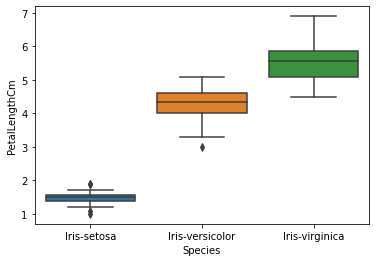

In [ ]:
sb.boxplot(x = "Species", y = "PetalLengthCm", data = df)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

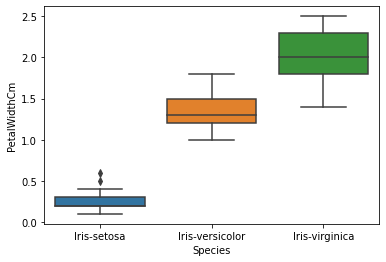

In [ ]:
sb.boxplot(x = "Species", y = "PetalWidthCm", data = df)

In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

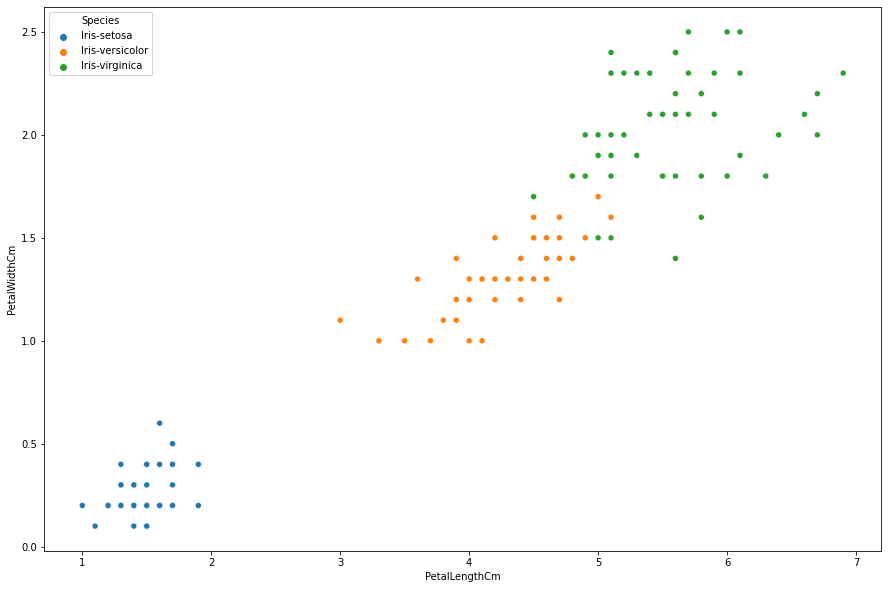

In [ ]:
fig_dims = (15,10)
fig, ax = plt.subplots(figsize = fig_dims)
sb.scatterplot(data = df, x = "PetalLengthCm", y = "PetalWidthCm", hue = "Species", ax=ax)

***We can see here that the petal characteristics have a beter cluster than the sepal characteristics. This means that petals will be more helpful in the species identification than the sepals.***

# Distribution of Petal Length and Width

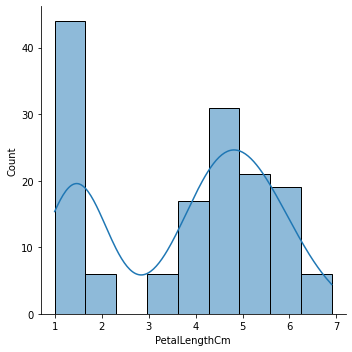

In [ ]:
sb.displot(x = "PetalLengthCm", data = df, kde = True)

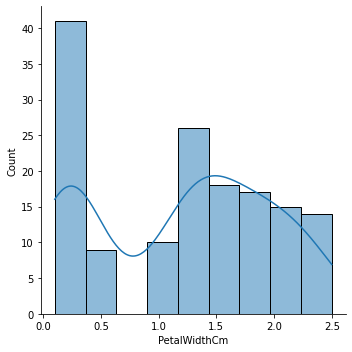

In [ ]:
sb.displot(x = "PetalWidthCm", data = df, kde = True)

# How length and width vary according to the species

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

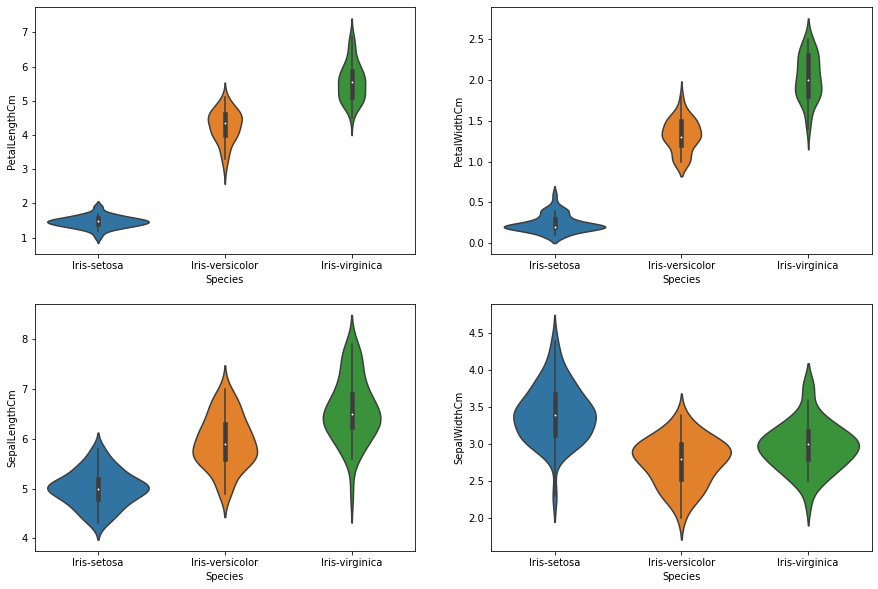

In [ ]:
plt.figure(figsize = (15,10)) #Specifying the size of the plot

#Specifying the number of rows and columns in the data
plt.subplot(2,2,1) #'1' specifies the index of the violin plot
sb.violinplot(x = "Species", y = "PetalLengthCm", data = df)
plt.subplot(2,2,2)
sb.violinplot(x = "Species", y = "PetalWidthCm", data = df)
plt.subplot(2,2,3)
sb.violinplot(x = "Species", y = "SepalLengthCm", data = df)
plt.subplot(2,2,4)
sb.violinplot(x = "Species", y = "SepalWidthCm", data = df)

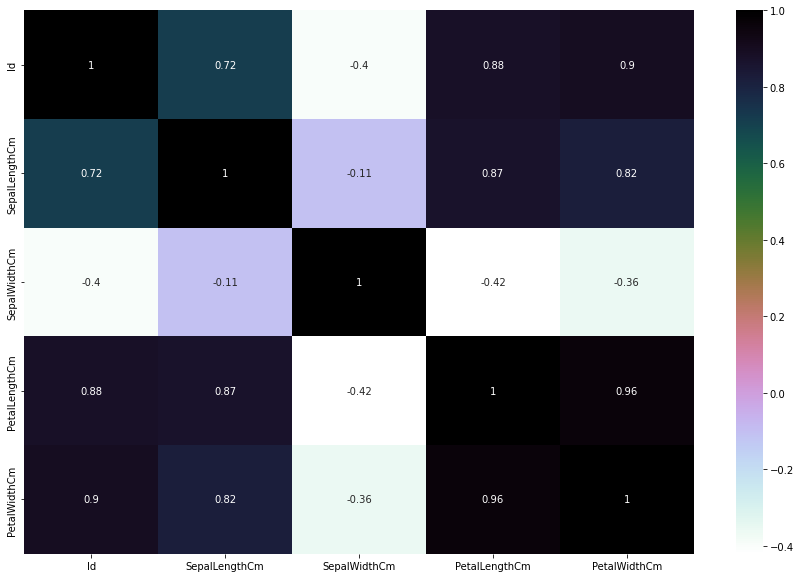

In [ ]:
plt.figure(figsize = (15,10))
sb.heatmap(df.corr(), annot = True, cmap = "cubehelix_r")
plt.show()

# Observation from the Heatmap

We can see that Sepal Length and Sepal Width are not correlated beacause tehy have a correlation value of -0.11. 

Whereas, Petal Width and Petal Length are highly correlated, having a correlation value of 0.96.

We'll use all the features for training the model and then we'll check the accuracy. Then we'll train another model if one feature each from Petal and Sepal, and then check the accuracy.

# Splitting the Data into for Training and Testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df_train, df_test = train_test_split(df, test_size = 0.3)

In [ ]:
df_train.shape

(105, 6)

In [ ]:
df_test.shape

(45, 6)

In [ ]:
train_X = df_train[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm",]]
train_y = df_train.Species

test_X = df_test[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm",]]
test_y = df_test.Species

In [ ]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
13,4.3,3.0,1.1,0.1
1,4.9,3.0,1.4,0.2
116,6.5,3.0,5.5,1.8
146,6.3,2.5,5.0,1.9
43,5.0,3.5,1.6,0.6


In [ ]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
29,4.7,3.2,1.6,0.2
12,4.8,3.0,1.4,0.1
147,6.5,3.0,5.2,2.0
22,4.6,3.6,1.0,0.2
88,5.6,3.0,4.1,1.3


# Support Vector Machine

In [ ]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)

In [ ]:
svm_accuracy = metrics.accuracy_score(prediction, test_y)

In [ ]:
svm_accuracy

0.9777777777777777

# Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
lr_acc = metrics.accuracy_score(prediction, test_y)

In [ ]:
print(lr_acc)

0.9777777777777777


# Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict (test_X)
dt_acc = metrics.accuracy_score(prediction, test_y)

In [ ]:
dt_acc

0.9555555555555556

# K-Nearest Neighbors

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
knn_acc = metrics.accuracy_score(prediction, test_y)

In [ ]:
knn_acc

0.9555555555555556

# KNN Classifier with other values of "n"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f39d9a8db90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

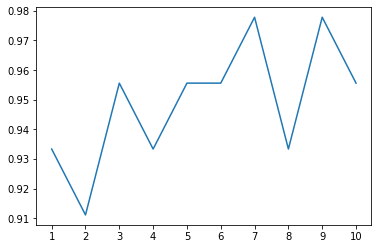

In [ ]:
a_index = list(range(1,11))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
plt.xticks(x)

> The above graph shows the accuracy of KNN Classification using different values of "n". 
> 
> The values of accuracy will be different every run due to the randomness of the data that is split between the testing and the training set.

# Using 1 Petal and 1 Sepal Feature

In [ ]:
petal = df[["PetalLengthCm", "PetalWidthCm", "Species"]]
sepal = df[["SepalLengthCm", "SepalWidthCm", "Species"]]

In [ ]:
petal

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [ ]:
sepal.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


# Test and Training Splitting

> Here, the data has been splitted for training and testing for both petal characteristics and sepal characteristics.

In [ ]:
train_p, test_p = train_test_split(petal, test_size = 0.3)

train_x_p = train_p[["PetalWidthCm", "PetalLengthCm"]]
train_y_p = train_p.Species

test_x_p = test_p[["PetalWidthCm", "PetalLengthCm"]]
test_y_p = test_p.Species

train_s, test_s = train_test_split(sepal, test_size = 0.3)

train_x_s = train_s[["SepalWidthCm", "SepalLengthCm"]]
train_y_s = train_s.Species

test_x_s = test_s[["SepalWidthCm", "SepalLengthCm"]]
test_y_s = test_s.Species

# Support Vector Machine

In [ ]:
#For Petals
model = svm.SVC()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
svm_p_acc = metrics.accuracy_score(prediction, test_y_p)

In [ ]:
svm_p_acc

1.0

In [ ]:
#For Sepals
model = svm.SVC()
model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
svm_s_acc = metrics.accuracy_score(prediction, test_y_s)

In [ ]:
svm_s_acc

0.7555555555555555

# Logistic Regression

In [ ]:
#For Petals
model = LogisticRegression()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
lr_p_acc = metrics.accuracy_score(prediction, test_y_p)

In [ ]:
lr_p_acc

1.0

In [ ]:
#For Sepals
model = LogisticRegression()
model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
lr_s_acc = metrics.accuracy_score(prediction, test_y_s)

In [ ]:
lr_s_acc

0.7777777777777778

# Decision Tree

In [ ]:
#For Petals
model = DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
prediction = model.predict (test_x_p)
dt_p_acc = metrics.accuracy_score(prediction, test_y_p)

In [ ]:
dt_p_acc

0.9777777777777777

In [ ]:
#For Sepals
model = DecisionTreeClassifier()
model.fit(train_x_s, train_y_s)
prediction = model.predict (test_x_s)
dt_s_acc = metrics.accuracy_score(prediction, test_y_s)

In [ ]:
dt_s_acc

0.6666666666666666

# K-Nearest Neighbors

In [ ]:
#For Petals
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
knn_p_acc = metrics.accuracy_score(prediction, test_y_p)

In [ ]:
knn_p_acc

0.9777777777777777

In [ ]:
#For Sepals
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
knn_s_acc = metrics.accuracy_score(prediction, test_y_s)

In [ ]:
knn_s_acc

0.7333333333333333

# Comparing Accuracy of Models with Petal Data vs Sepal Data

In [ ]:
accuracy_petals = [svm_p_acc, lr_p_acc, dt_p_acc, knn_p_acc]
accuracy_sepals = [svm_s_acc, lr_s_acc, dt_s_acc, knn_s_acc]

In [ ]:
accuracy_petals

[1.0, 1.0, 0.9777777777777777, 0.9777777777777777]

In [ ]:
data = {"accuracy_petals": [svm_p_acc, lr_p_acc, dt_p_acc, knn_p_acc], "accuracy_sepals": [svm_s_acc, lr_s_acc, dt_s_acc, knn_s_acc]}

In [ ]:
data

{'accuracy_petals': [1.0, 1.0, 0.9777777777777777, 0.9777777777777777],
 'accuracy_sepals': [0.7555555555555555,
  0.7777777777777778,
  0.6666666666666666,
  0.7333333333333333]}

In [ ]:
models_df = pd.DataFrame(data, index = ["SVM", "Logistic Regression", "Decision Tree", "KNN"])

In [ ]:
models_df

,accuracy_petals,accuracy_sepals
SVM,1.000000,0.755556
Logistic Regression,1.000000,0.777778
Decision Tree,0.977778,0.666667
KNN,0.977778,0.733333


<AxesSubplot:>

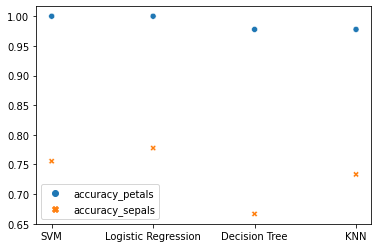

In [ ]:
sb.scatterplot(data = models_df)

# What do we see from the Scatterplot?

As was earlier hypothesized, that petals would be a more accurate classification feature for species, the same can be seen in the scatter plot above. The petals have an higher accuracy score of predicting the species of the flower than the sepals for every model. 